<a href="https://colab.research.google.com/github/thapaangel/KMeansClustering/blob/main/KmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Converged at iteration 3

Final Cluster Assignments:
Point [1. 2.] -> Cluster 1
Point [1.5 1.8] -> Cluster 1
Point [5. 8.] -> Cluster 0
Point [8. 8.] -> Cluster 0
Point [1.  0.6] -> Cluster 1
Point [ 9. 11.] -> Cluster 0
Point [8. 2.] -> Cluster 0
Point [10.  2.] -> Cluster 0
Point [9. 3.] -> Cluster 0
Point [4. 9.] -> Cluster 0

Final Centroids:
[[7.57142857 6.14285714]
 [1.16666667 1.46666667]]

WCSS (Within-Cluster Sum of Squares): 113.8848


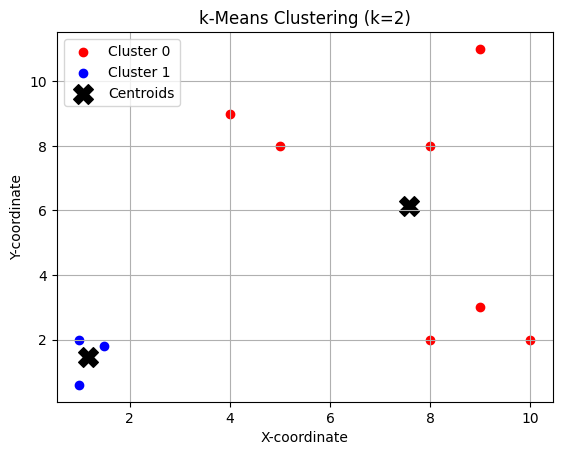

In [1]:
# 2featurekmeans
import numpy as np
import matplotlib.pyplot as plt

# Provided 2D dataset
data = np.array([
    [1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6],
    [9, 11], [8, 2], [10, 2], [9, 3], [4, 9]
])

k = 2
max_iters = 100

# Step 1: Random initialization of centroids
np.random.seed(42)
centroids = data[np.random.choice(len(data), k, replace=False)]

for iteration in range(max_iters):
    # Step 2: Assign clusters based on closest centroid
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)

    # Step 3: Calculate new centroids
    new_centroids = np.array([data[cluster_assignments == j].mean(axis=0) for j in range(k)])

    # Check convergence
    if np.allclose(centroids, new_centroids):
        print(f"Converged at iteration {iteration + 1}")
        break
    centroids = new_centroids

# Final assignments and centroids
print("\nFinal Cluster Assignments:")
for idx, point in enumerate(data):
    print(f"Point {point} -> Cluster {cluster_assignments[idx]}")

print("\nFinal Centroids:")
print(centroids)

# WCSS (Within-cluster sum of squares)
wcss = 0
for j in range(k):
    cluster_points = data[cluster_assignments == j]
    wcss += np.sum((cluster_points - centroids[j]) ** 2)

print(f"\nWCSS (Within-Cluster Sum of Squares): {wcss:.4f}")

# Visualization
colors = ['red', 'blue']
for j in range(k):
    cluster_points = data[cluster_assignments == j]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[j], label=f'Cluster {j}')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='black', label='Centroids')
plt.title("k-Means Clustering (k=2)")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend()
plt.grid(True)
plt.show()

Converged at iteration 2
Final cluster assignments:
Sample 0: Cluster 2
Sample 1: Cluster 2
Sample 2: Cluster 2
Sample 3: Cluster 2
Sample 4: Cluster 0
Sample 5: Cluster 0
Sample 6: Cluster 0
Sample 7: Cluster 0
Sample 8: Cluster 1
Sample 9: Cluster 1
Sample 10: Cluster 0
Sample 11: Cluster 0

Final centroid positions:
[[4.25       4.65       3.86666667 4.25      ]
 [2.05       2.25       1.85       2.05      ]
 [1.15       1.55       0.8125     1.1875    ]]

Within-Cluster Sum of Squares (WCSS): 0.6421


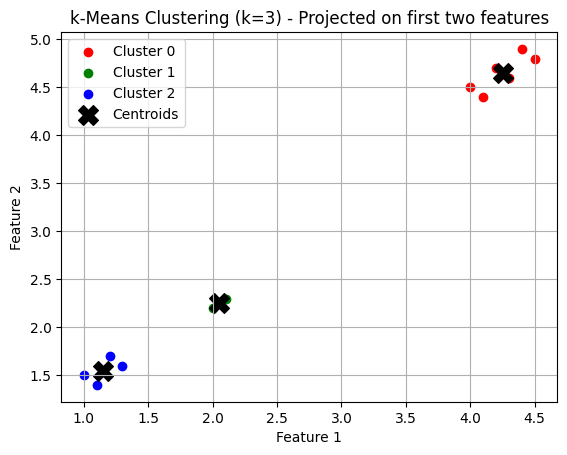

In [2]:
#Generalized Kmeans
import numpy as np
import matplotlib.pyplot as plt

# Dataset with 12 samples and 4 features
data = np.array([
    [1.0, 1.5, 0.8, 1.2],
    [1.2, 1.7, 0.9, 1.1],
    [1.1, 1.4, 0.7, 1.3],
    [1.3, 1.6, 0.85, 1.15],
    [4.0, 4.5, 3.8, 4.2],
    [4.2, 4.7, 3.9, 4.1],
    [4.1, 4.4, 3.7, 4.3],
    [4.3, 4.6, 3.85, 4.15],
    [2.0, 2.2, 1.8, 2.1],
    [2.1, 2.3, 1.9, 2.0],
    [4.5, 4.8, 4.0, 4.4],
    [4.4, 4.9, 3.95, 4.35]
])

k = 3
max_iters = 100
np.random.seed(42)

# Initialize centroids randomly from data points
centroids = data[np.random.choice(len(data), k, replace=False)]

for iteration in range(max_iters):
    # Compute distances from points to centroids
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)  # shape (n_samples, k)
    cluster_assignments = np.argmin(distances, axis=1)  # Assign clusters based on closest centroid

    # Compute new centroids
    new_centroids = np.array([
        data[cluster_assignments == j].mean(axis=0) if np.any(cluster_assignments == j) else centroids[j]
        for j in range(k)
    ])

    # Check convergence
    if np.allclose(centroids, new_centroids):
        print(f"Converged at iteration {iteration + 1}")
        break

    centroids = new_centroids

# Final results
print("Final cluster assignments:")
for idx, cluster in enumerate(cluster_assignments):
    print(f"Sample {idx}: Cluster {cluster}")

print("\nFinal centroid positions:")
print(centroids)

# Compute WCSS
wcss = 0
for j in range(k):
    points = data[cluster_assignments == j]
    wcss += np.sum((points - centroids[j]) ** 2)
print(f"\nWithin-Cluster Sum of Squares (WCSS): {wcss:.4f}")

# Visualization (project onto first two features)
colors = ['red', 'green', 'blue']
for j in range(k):
    cluster_points = data[cluster_assignments == j]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[j], label=f'Cluster {j}')

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('k-Means Clustering (k=3) - Projected on first two features')
plt.legend()
plt.grid(True)
plt.show()